In [108]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [109]:
dataset_path = '/home/amanda/Dropbox/trabalho/testes/aplicacoes/auto-mpg/auto-mpg.csv'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

#raw_dataset = pd.read_csv(dataset_path, names=column_names,
#                      na_values = "?", comment='\t',
#                      sep=",", skipinitialspace=True)

raw_dataset = pd.read_csv(dataset_path, na_values = "?")
dataset = raw_dataset.copy()
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [110]:
dataset = dataset.dropna()

In [111]:
dataset.pop('origin')
dataset.pop('car name')

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 392, dtype: object

In [112]:
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82
397,31.0,4,119.0,82.0,2720,19.4,82


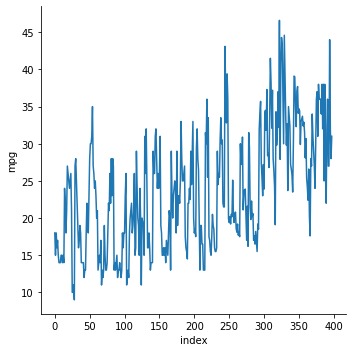

In [113]:
sns.relplot(x='index', y='mpg', kind='line', data=dataset.reset_index())

In [114]:
train_dataset = dataset[:196]
test_dataset = dataset[196:]

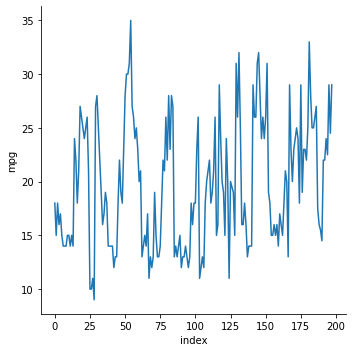

In [115]:
sns.relplot(x='index', y='mpg', kind='line', data=train_dataset.reset_index())

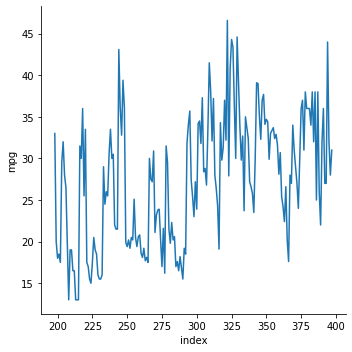

In [116]:
sns.relplot(x='index', y='mpg', kind='line', data=test_dataset.reset_index())

In [117]:
train_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


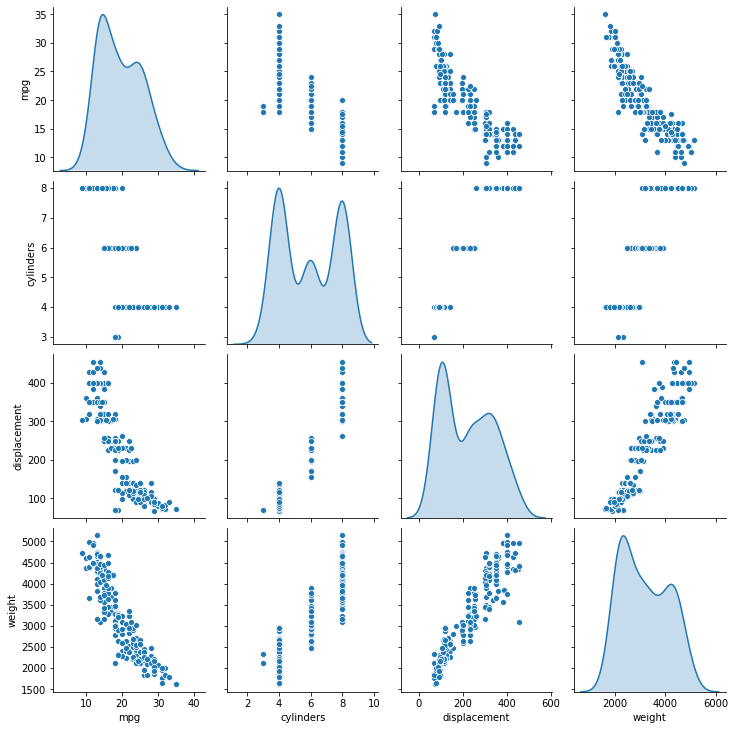

In [118]:
sns.pairplot(train_dataset[["mpg", "cylinders", "displacement", "weight"]], diag_kind="kde")

In [119]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
mpg,196.0,19.686224,5.830931,9.0,14.875,19.00,24.125,35.0
cylinders,196.0,5.908163,1.789352,3.0,4.000,6.00,8.000,8.0
displacement,196.0,224.227041,115.409042,68.0,113.750,231.00,318.000,455.0
horsepower,196.0,116.244898,43.615232,46.0,86.000,100.00,150.000,230.0
weight,196.0,3185.209184,935.782263,1613.0,2307.500,3062.00,4085.500,5140.0
acceleration,196.0,14.975000,2.869153,8.0,13.000,14.95,16.500,23.5
model year,196.0,72.821429,1.868429,70.0,71.000,73.00,74.000,76.0


In [120]:
def scale(x):
  return (x - train_stats['min']) / (train_stats['max'] - train_stats['min'])
scaled_train_data = scale(train_dataset)
scaled_test_data = scale(test_dataset)

In [121]:
scaled_train_data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
193,0.576923,0.6,0.341085,0.190217,0.396654,0.619355,1.0
194,0.519231,0.6,0.423773,0.239130,0.417352,0.619355,1.0
195,0.769231,0.2,0.043928,0.032609,0.119648,0.916129,1.0
196,0.596154,0.2,0.077519,0.076087,0.156223,0.909677,1.0
197,0.769231,0.2,0.056848,0.130435,0.091863,0.400000,1.0


In [122]:
train_labels = scaled_train_data.pop('mpg')
test_labels = scaled_test_data.pop('mpg')

In [123]:
path = '/home/amanda/Dropbox/trabalho/testes/aplicacoes/auto-mpg/data/'
np.savetxt(path + 'X_train.csv', scaled_train_data)
np.savetxt(path + 'X_test.csv', scaled_test_data)
np.savetxt(path + 'Y_train.csv', train_labels)
np.savetxt(path + 'Y_test.csv', test_labels)